<a href="https://colab.research.google.com/github/kiran20v/python/blob/master/Multi_Classification_3_Deep_Neural.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical

In [0]:
n_pts = 500
center = [[-1,1],[-1, -1],[1, -1]]
X, y = datasets.make_blobs(n_samples=n_pts, random_state=123, centers=center, cluster_std=0.4)
print(X)
print(y)

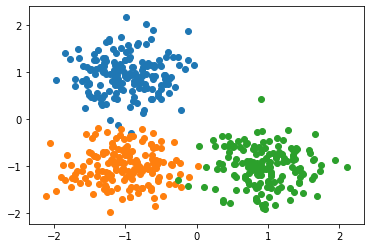

In [12]:
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.scatter(X[y==2, 0], X[y==2, 1])

In [16]:
print(y)
y_cat = to_categorical(y, 3)
print(y_cat)

[2 2 2 0 1 0 0 2 2 2 1 1 0 0 1 2 2 2 2 0 2 0 1 2 1 2 0 0 2 1 1 0 0 2 1 0 2
 0 2 0 0 2 1 0 2 0 1 2 0 2 0 1 1 0 1 2 2 0 1 2 0 2 0 2 1 0 1 1 1 1 2 1 1 1
 1 1 2 1 1 2 0 1 2 2 1 0 2 1 1 2 0 0 2 1 2 2 0 1 2 0 2 1 1 2 2 0 0 1 2 1 1
 2 0 0 1 0 2 2 2 2 1 2 1 2 0 2 2 0 1 0 0 0 0 2 0 1 0 2 2 0 2 2 2 2 1 2 0 0
 0 2 1 0 2 0 0 1 1 0 2 0 0 1 1 2 2 0 2 1 2 2 2 1 1 1 2 0 0 1 0 1 2 2 1 1 2
 1 1 0 0 2 2 1 0 0 0 0 2 2 0 2 1 1 2 0 0 2 2 0 1 0 2 0 2 2 0 0 2 1 2 0 2 0
 1 1 2 0 0 0 2 1 2 2 2 0 0 1 0 2 0 2 0 2 1 1 1 2 2 1 1 1 0 1 2 1 0 1 2 2 0
 0 0 1 1 1 2 1 1 2 1 1 2 0 0 0 2 0 2 0 0 0 2 1 1 0 2 1 0 0 1 1 1 1 2 1 1 0
 0 0 2 1 1 1 0 0 0 0 0 0 0 1 2 1 2 1 0 2 0 0 1 2 0 1 2 2 2 2 2 0 1 2 0 2 1
 0 0 1 2 0 2 0 1 1 0 2 1 0 1 1 1 0 2 0 2 0 1 1 0 1 1 1 2 2 0 2 0 2 2 1 1 0
 2 2 2 1 1 1 2 2 0 1 2 1 2 0 1 2 2 2 0 1 1 1 2 0 2 0 0 2 1 1 1 2 0 1 0 0 1
 1 2 0 0 1 2 1 1 0 2 0 1 0 2 0 0 0 1 1 1 2 0 1 1 0 2 1 2 1 1 1 1 0 0 0 0 0
 2 2 1 1 0 1 0 2 2 2 2 0 0 1 1 0 0 1 1 1 2 2 1 1 1 1 0 0 2 0 1 0 1 0 1 1 2
 2 0 2 2 1 0 1 2 0 2 0 2 

In [18]:
model = Sequential()
model.add(Dense(units=3, input_shape=(2,), activation='softmax'))
model.compile(Adam(0.1), loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
model.fit(x=X, y=y_cat, verbose=1, batch_size=50, epochs=100)

In [0]:
def plot_descision_boundary(X, y, model):
    x_span = np.linspace(min(X[:, 0]) - 0.25, max(X[:, 0]) + 0.25, 50)
    y_span = np.linspace(min(X[:, 1]) - 0.25, max(X[:, 1]) + 0.25, 50)
    #print(y_span)
    xx, yy = np.meshgrid(x_span, y_span)
    #print(xx)
    #print(yy)
    xx_, yy_ = xx.ravel(), yy.ravel()
    grid = np.c_[xx_, yy_]
    pred_func = model.predict_classes(grid)
    z = pred_func.reshape(xx.shape)
    plt.contourf(xx, yy, z)

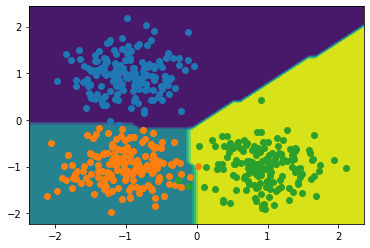

In [22]:
plot_descision_boundary(X, y, model)
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.scatter(X[y==2, 0], X[y==2, 1])

Prediction1:  [0]
Prediction2:  [1]
Prediction3:  [2]


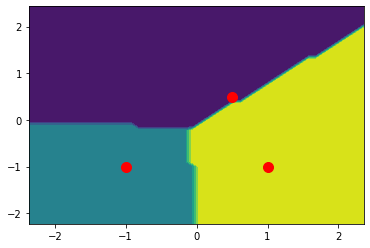

In [26]:
plot_descision_boundary(X, y, model)
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.scatter(X[y==2, 0], X[y==2, 1])

x=0.5
y=0.5
point = np.array([[x, y]])
prediction = model.predict_classes(point)
plt.plot([x], [y], marker='o', markersize=10, color='r')
print("Prediction1: ", prediction)

x=-1
y=-1
point = np.array([[x, y]])
prediction = model.predict_classes(point)
plt.plot([x], [y], marker='o', markersize=10, color='r')
print("Prediction2: ", prediction)

x=1
y=-1
point = np.array([[x, y]])
prediction = model.predict_classes(point)
plt.plot([x], [y], marker='o', markersize=10, color='r')
print("Prediction3: ", prediction)